Within this we need to find the best split in order to maximize the Qfunciton while minimizing the impurtiy criteria aka the Entropy and Gini values

In [57]:
#import necessary packages

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import collections

In [58]:
dataset = pd.read_csv("Pokemon.csv")
dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [59]:
dataset.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

As we can see from the initial data we have various of different data values from boolean, integer, and string values. We will first set the Name as our index of the current dataframe since the # feature within the dataframe does not contribute any info that a pokemon could be a legendary based on their pokemon number

In [60]:
dataset = dataset.drop("#",axis=1)
dataset = dataset.drop("Name",axis=1)
dataset.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False


<AxesSubplot:>

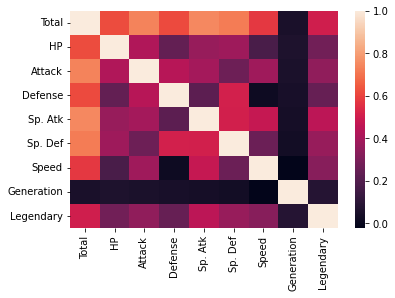

In [61]:
sns.heatmap(dataset.corr())

With this heatmap we are able to look at the legendary feature in order to find which features seem to stand out in what feature correlates the most with being a legendary. We can see from here that our total, sp. attack, attack, sp defense are the features that stand out the most

Withour data set we have features that are label values vs a numerical value example Type 1 and Type 2 where Bulbasaur is Grass and Poison. We want to be able to represent these values numerically vs a label as the algorithms will not be able to operate on the text value. With the code below we are converting the types into encoding the features to 0 and 1 where 1 is the type the pokemon is under. We could also drop this data if we want

In [62]:
dataset.fillna("Other")
dataset = pd.get_dummies(dataset, drop_first=True)
print(dataset.head(1))

   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  \
0    318  45      49       49       65       65     45           1      False   

   Type 1_Dark  ...  Type 2_Ghost  Type 2_Grass  Type 2_Ground  Type 2_Ice  \
0            0  ...             0             0              0           0   

   Type 2_Normal  Type 2_Poison  Type 2_Psychic  Type 2_Rock  Type 2_Steel  \
0              0              1               0            0             0   

   Type 2_Water  
0             0  

[1 rows x 43 columns]


False    735
True      65
Name: Legendary, dtype: int64


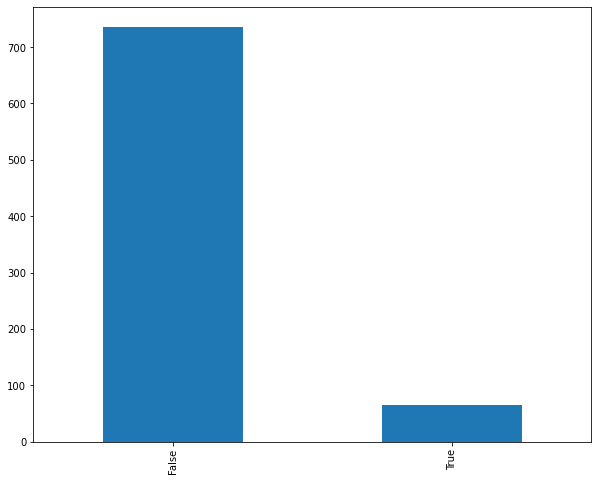

In [63]:
legendary_ct = dataset["Legendary"].value_counts()
legendary_ct.plot(kind='bar',figsize = (10,8))
print(legendary_ct)

Since we have a such a large disparity between pokemon that are legendary and pokemon that are not we will undersample the normal pokemon types in order to avoid overfitting the data. 

We are setting our x value to the features we have of the pokemon without the Legendary values so that we can set the y value as our output that we are trying to predict

In [64]:
x = dataset.drop('Legendary',axis=1)
y = dataset['Legendary']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 47, test_size=0.30)

In [65]:
decTree = DecisionTreeClassifier(random_state = 42)
decTree.fit(X_train.values, y_train.values)

DecisionTreeClassifier(random_state=42)

In [66]:
print(f"Accuracy of Decision Tree: {decTree.score(X_test.values,y_test.values):.4f}")

Accuracy of Decision Tree: 0.9542


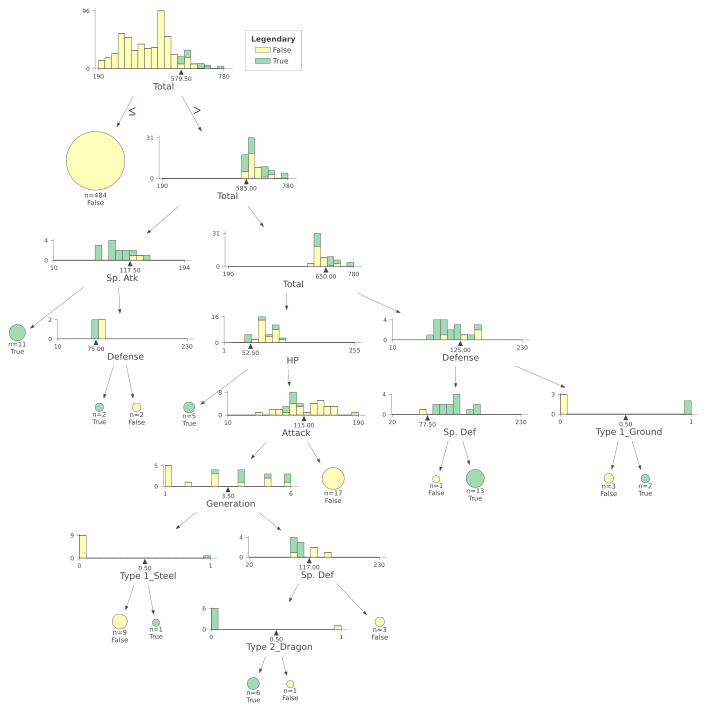

In [67]:
from dtreeviz.trees import dtreeviz

visual = dtreeviz(decTree,
                   x_data = X_train,
                   y_data = y_train,
                   target_name = 'Legendary',
                   feature_names = list(x.columns),
                   class_names = list(y.unique())        
)
visual.save("decision_tree.svg")
visual

In [69]:
import pprint
tempDict = dict(zip(x.columns,decTree.feature_importances_))
tempVar = collections.Counter(tempDict)
for k,v in tempVar.most_common(10):
    print('%s: %f' % (k,v))

Total: 0.637544
HP: 0.077963
Sp. Def: 0.066538
Defense: 0.054636
Generation: 0.033654
Type 1_Ground: 0.032308
Attack: 0.030307
Type 1_Steel: 0.024231
Type 2_Dragon: 0.023077
Sp. Atk: 0.019744


As we can see from the feature importances score we can see Total has the best score out of all of our features that is the best prediction value for if a pokemon is a legendary

In [83]:
print(dataset.shape[1])

43


With our random forest classifier I decided it was best to not set a max depth as to allow the tree try as many combinations of the features and set the the number of trees to be produced to be 128 as according to Oshiro et al. (2012) after about 128 trees there really is no significant improvement in accuracy 

Reference: Oshiro, T.M., Perez, P.S. and Baranauskas, J.A., 2012, July. How many trees in a random forest?. In MLDM (pp. 154-168).

In [91]:
mod = RandomForestClassifier(n_estimators = 128, max_depth=None)
randomForest = mod.fit(X_train.values, y_train.values)
print(f"Accuracy of Random Forest Tree: {randomForest.score(X_test.values,y_test.values):.4f}")

Accuracy of Random Forest Tree: 0.9458


In [92]:
import pprint
tempDict = dict(zip(x.columns,randomForest.feature_importances_))
tempVar = collections.Counter(tempDict)
for k,v in tempVar.most_common(10):
    print('%s: %f' % (k,v))

Total: 0.257564
Sp. Atk: 0.114396
Sp. Def: 0.106524
Speed: 0.101408
HP: 0.088598
Defense: 0.072572
Attack: 0.070116
Generation: 0.043446
Type 1_Psychic: 0.028746
Type 1_Dragon: 0.009868


As we can see above the best feature is again Total according to our random forest feature importances values